In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [3]:
data = pd.read_csv('wfp_food_prices_phl_preprocessed.csv')

In [4]:
data.head()

,market,category,commodity,unit,priceflag,pricetype,price
0,Metro Manila,cereals and tubers,Maize flour (yellow),KG,actual,Retail,15.00
1,Metro Manila,cereals and tubers,"Rice (milled, superior)",KG,actual,Retail,20.00
2,Metro Manila,cereals and tubers,"Rice (milled, superior)",KG,actual,Wholesale,18.35
3,Metro Manila,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,18.00
4,Metro Manila,cereals and tubers,"Rice (regular, milled)",KG,actual,Wholesale,16.35


In [5]:
data.describe()

,price
count,162552.000000
mean,119.410290
std,110.877879
min,1.600000
25%,42.180000
50%,82.760000
75%,163.682500
max,1166.000000


In [6]:
y = data['price']
x1 = data[['market','category','commodity','unit','priceflag','pricetype']]

In [7]:
x_encoded = pd.get_dummies(data[['market', 'category', 'commodity', 'unit', 'priceflag', 'pricetype']], 
                           drop_first=True)
x_encoded = x_encoded.astype(int)
x = sm.add_constant(x_encoded)
results = sm.OLS(y, x).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     5747.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:25:24   Log-Likelihood:            -8.3249e+05
No. Observations:              162552   AIC:                         1.665e+06
Df Residuals:                  162368   BIC:                         1.667e+06
Df Model:                         183                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

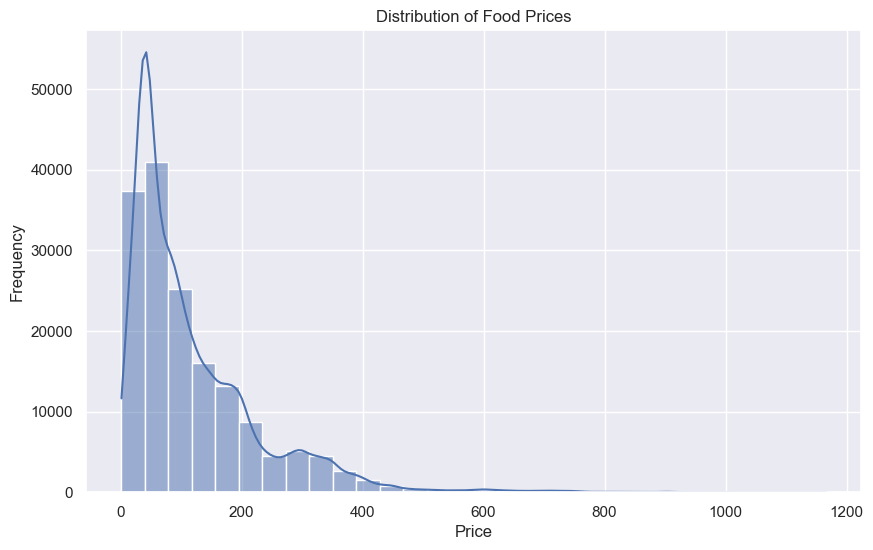

In [8]:
# histogram of food prices
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, bins=30)
plt.title('Distribution of Food Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

C:\Users\franj\AppData\Local\Temp\ipykernel_17780\551344984.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category', y='price', data=data, estimator=np.mean, ci=None)


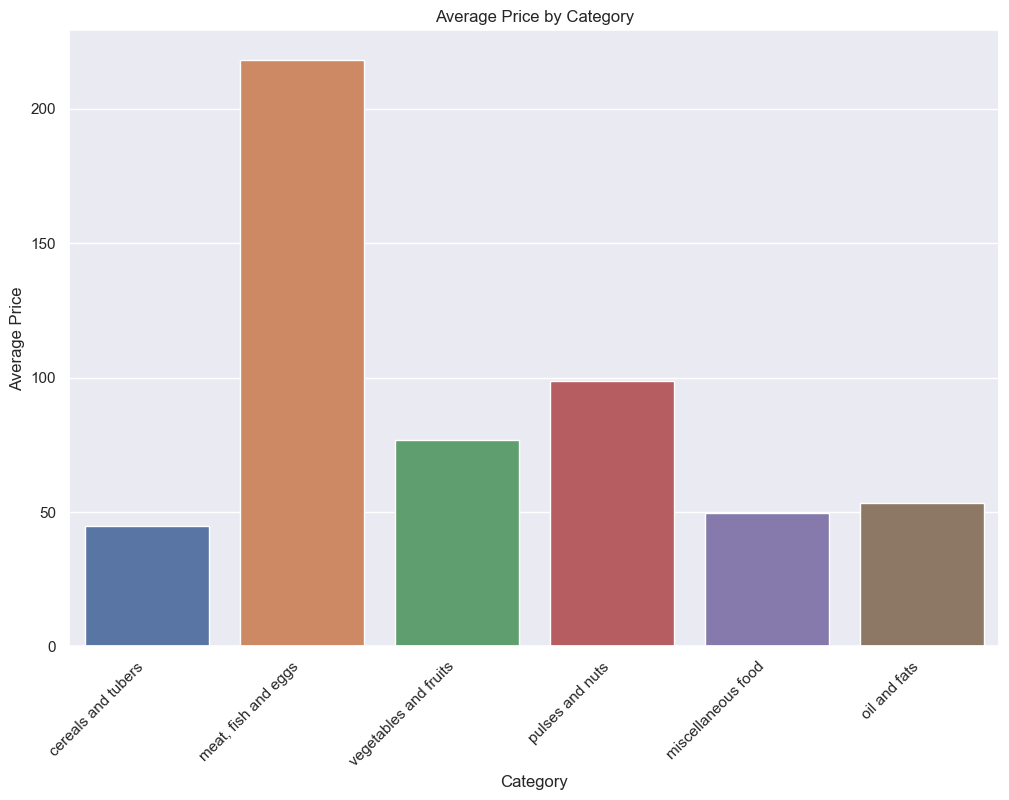

In [11]:
plt.figure(figsize=(12, 8))
sns.barplot(x='category', y='price', data=data, estimator=np.mean, ci=None)
plt.xticks(rotation=45, ha='right')
plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.show()

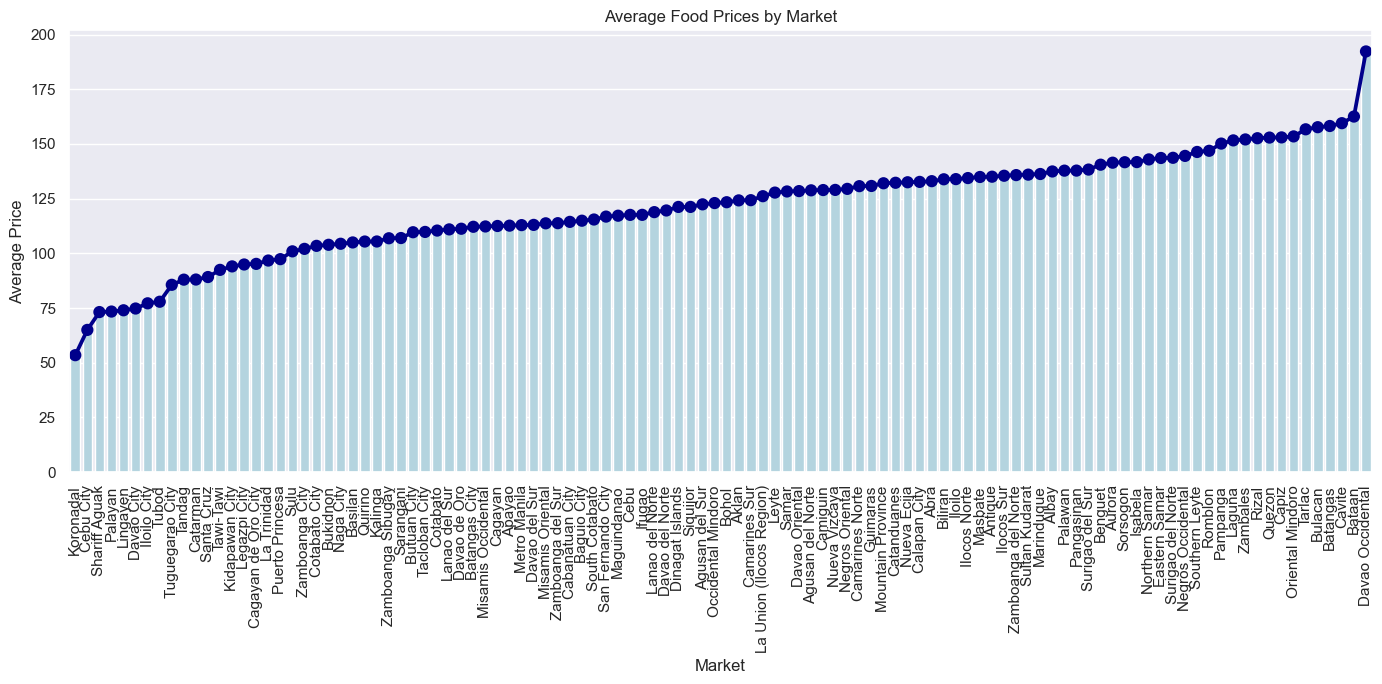

In [12]:
mean_prices = data.groupby('market')['price'].mean().reset_index()
mean_prices = mean_prices.sort_values('price')
plt.figure(figsize=(14, 7))
sns.barplot(x='market', y='price', data=mean_prices, color='lightblue')
sns.pointplot(x='market', y='price', data=mean_prices, color='darkblue', capsize=.2)
plt.xticks(rotation=90)
plt.xlabel('Market')
plt.ylabel('Average Price')
plt.title('Average Food Prices by Market')
plt.tight_layout()
plt.show()


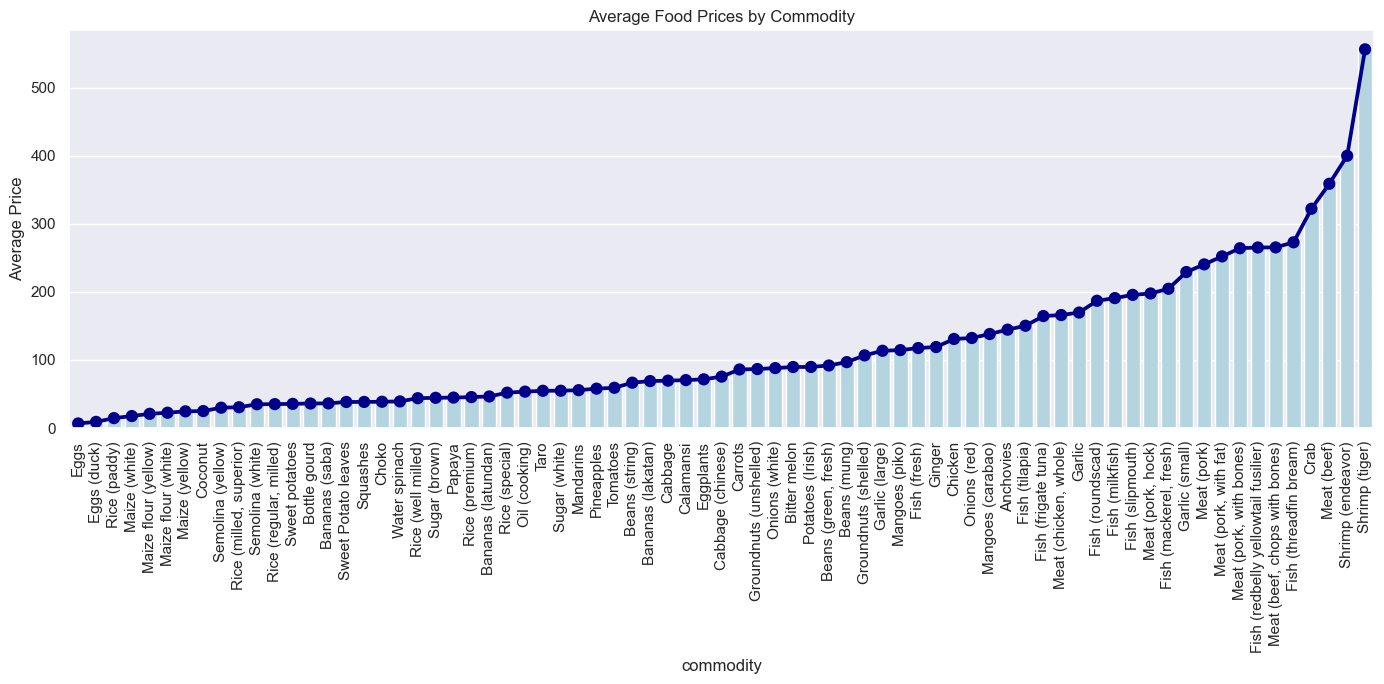

In [15]:
mean_prices = data.groupby('commodity')['price'].mean().reset_index()
mean_prices = mean_prices.sort_values('price')
plt.figure(figsize=(14, 7))
sns.barplot(x='commodity', y='price', data=mean_prices, color='lightblue')
sns.pointplot(x='commodity', y='price', data=mean_prices, color='darkblue', capsize=.2)
plt.xticks(rotation=90)
plt.xlabel('commodity')
plt.ylabel('Average Price')
plt.title('Average Food Prices by Commodity')
plt.tight_layout()
plt.show()

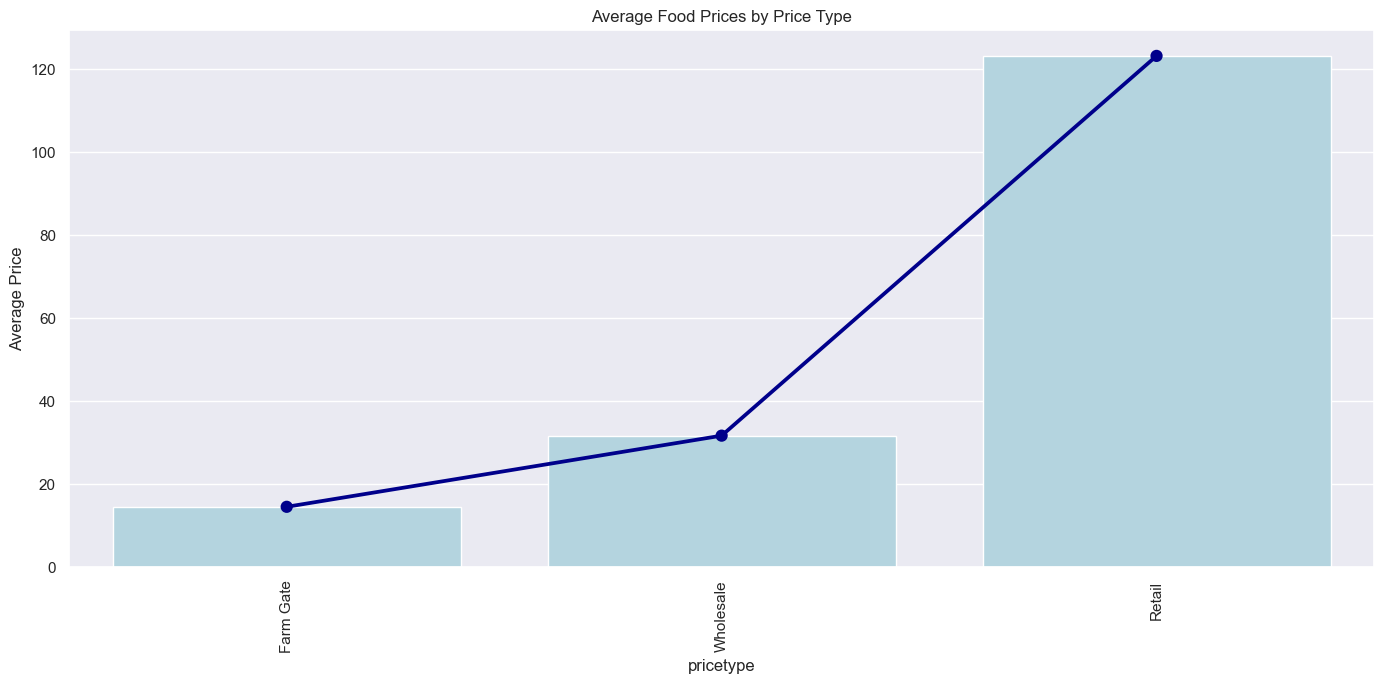

In [16]:
mean_prices = data.groupby('pricetype')['price'].mean().reset_index()
mean_prices = mean_prices.sort_values('price')
plt.figure(figsize=(14, 7))
sns.barplot(x='pricetype', y='price', data=mean_prices, color='lightblue')
sns.pointplot(x='pricetype', y='price', data=mean_prices, color='darkblue', capsize=.2)
plt.xticks(rotation=90)
plt.xlabel('pricetype')
plt.ylabel('Average Price')
plt.title('Average Food Prices by Price Type')
plt.tight_layout()
plt.show()